<a href="https://colab.research.google.com/github/jsebastianquiroga/IMAGE_VIDEO_PROCESSING_PUJ/blob/main/proyecto/proyecto_garcia_quiroga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalar la API de Kaggle
!pip install -q kaggle

In [2]:
# Descargar el archivo kaggle.json desde tu repositorio de GitHub
!wget https://raw.githubusercontent.com/jsebastianquiroga/IMAGE_VIDEO_PROCESSING_PUJ/main/proyecto/kaggle.json

# Preparar el archivo de credenciales
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el conjunto de datos
!kaggle datasets download -d kmader/mias-mammography

# Descomprimir el conjunto de datos
!unzip mias-mammography.zip

--2023-09-14 03:02:15--  https://raw.githubusercontent.com/jsebastianquiroga/IMAGE_VIDEO_PROCESSING_PUJ/main/proyecto/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      68  --.-KB/s    in 0s      

2023-09-14 03:02:16 (5.83 MB/s) - ‘kaggle.json’ saved [68/68]

 99% 308M/312M [00:11<00:00, 35.9MB/s]
100% 312M/312M [00:11<00:00, 27.9MB/s]
Archive:  mias-mammography.zip
  inflating: Info.txt                
  inflating: all-mias.tar.gz         
  inflating: all-mias/Info.txt       
  inflating: all-mias/Licence.txt    
  inflating: all-mias/README         
  inflating: all-mias/mdb001.pgm     
  inflating: all-mias/mdb002.pgm     
  inflating: all-mias/mdb003.

# Muestreo.

Se toma el top 50  para el procesamiento.

In [3]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Listar todas las imágenes disponibles
all_images = os.listdir('all-mias')

# Muestrear 50 imágenes aleatoriamente
sampled_images = random.sample(all_images, 50)

In [4]:
import shutil
import os
from google.colab import drive
drive.mount('/content/drive')

def copy_to_drive(drive_path, local_path):
    # Check if the directory exists. If not, create it.
    if not os.path.exists(drive_path):
        os.makedirs(drive_path)

    # Copy individual files from local folder to Google Drive folder
    for file in os.listdir(local_path):
        shutil.copy(os.path.join(local_path, file), drive_path)

# Crear la carpeta "muestreo" si no existe
if not os.path.exists('./muestreo'):
    os.makedirs('./muestreo')

# Copiar las imágenes muestreadas a la carpeta "muestreo"
for image in sampled_images:
    shutil.copy(os.path.join('all-mias', image), './muestreo')

# Especifica la ruta directamente a la carpeta en tu Google Drive
drive_path = '/content/drive/My Drive/19sU2JfSIY5OZVyJyRqFvLZAaS0um5R4f/muestreo'

# Ahora, utiliza la función copy_to_drive que definimos anteriormente para copiar la carpeta a Google Drive
copy_to_drive(drive_path, "./muestreo")

Mounted at /content/drive


# Aplicar técnicas de procesamiento de imágenes

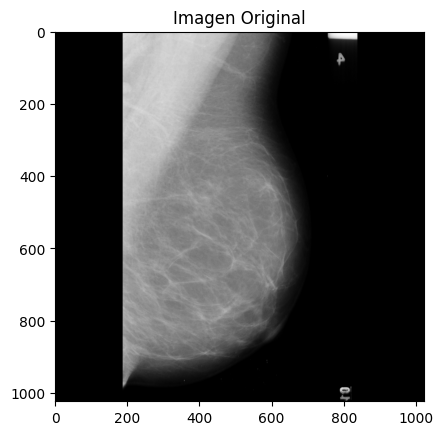

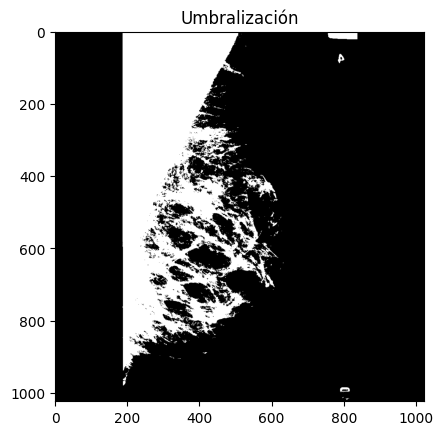

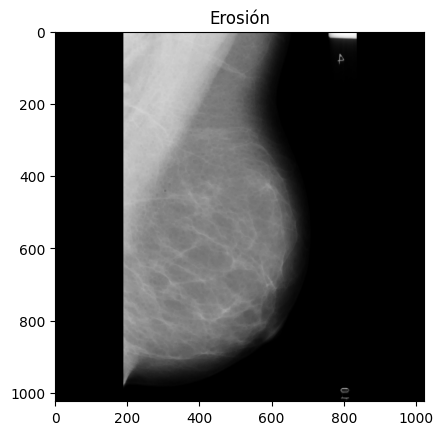

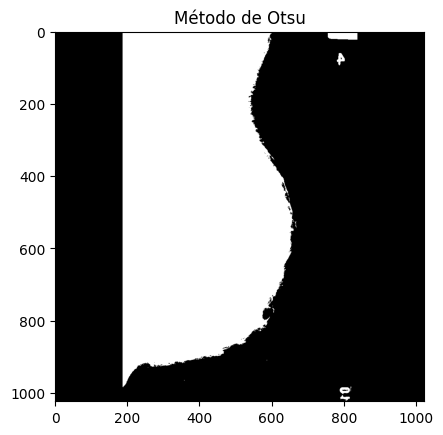

In [5]:
import shutil

# Crear la carpeta "muestreo" si no existe
if not os.path.exists('./muestreo'):
    os.makedirs('./muestreo')

# Copiar las imágenes muestreadas a la carpeta "muestreo"
for image in sampled_images:
    shutil.copy(os.path.join('all-mias', image), './muestreo')

# Ahora, utiliza la función copy_to_drive que definimos anteriormente para copiar la carpeta a Google Drive
copy_to_drive("19sU2JfSIY5OZVyJyRqFvLZAaS0um5R4f", "./muestreo")
# Elegir una imagen al azar de las 50 muestreadas
random_image_path = os.path.join('all-mias', random.choice(sampled_images))
image = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen original
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.show()

# Umbralización
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.title('Umbralización')
plt.show()

# Morfología Matemática: Erosión
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
eroded = cv2.erode(image, kernel, iterations=1)
plt.imshow(eroded, cmap='gray')
plt.title('Erosión')
plt.show()

# Filtrado por el método de Otsu
_, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu, cmap='gray')
plt.title('Método de Otsu')
plt.show()